In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tutorial.chapter8.demo.code.apriori import *

In [2]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['figure.figsize']=(20,10)

In [6]:
fn='tutorial/chapter8/demo/data/GoodsOrder.csv'
data=pd.read_csv(fn,encoding='gbk')

In [7]:
data.head()

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43367 non-null  int64 
 1   Goods   43367 non-null  object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


In [9]:
data=data['id']

In [10]:
data.describe()

count    43367.000000
mean      4908.589504
std       2843.118248
min          1.000000
25%       2455.500000
50%       4828.000000
75%       7380.500000
max       9835.000000
Name: id, dtype: float64

In [12]:
description = [data.count(),data.min(),data.max()]

In [13]:
description = pd.DataFrame(description,index=['Count','Min','Max']).T

In [14]:
description

,Count,Min,Max
0,43367,1,9835


In [15]:
data=pd.read_csv(fn,encoding='gbk')

In [18]:
group = data.groupby(['Goods']).count().reset_index()

In [22]:
sorted_goods = group.sort_values('id',ascending=False) 

In [23]:
sorted_goods

,Goods,id
7,全脂牛奶,2513
8,其他蔬菜,1903
155,面包卷,1809
134,苏打,1715
150,酸奶,1372
...,...,...
33,厨房用具,4
23,包装袋,4
154,防腐用品,2
49,婴儿食品,1


In [25]:
print(sorted_goods[:10])

     Goods    id
7     全脂牛奶  2513
8     其他蔬菜  1903
155    面包卷  1809
134     苏打  1715
150     酸奶  1372
99     瓶装水  1087
70   根茎类蔬菜  1072
85    热带水果  1032
143    购物袋   969
160     香肠   924


In [27]:
x=sorted_goods[:10]['Goods']
y=sorted_goods[:10]['id']

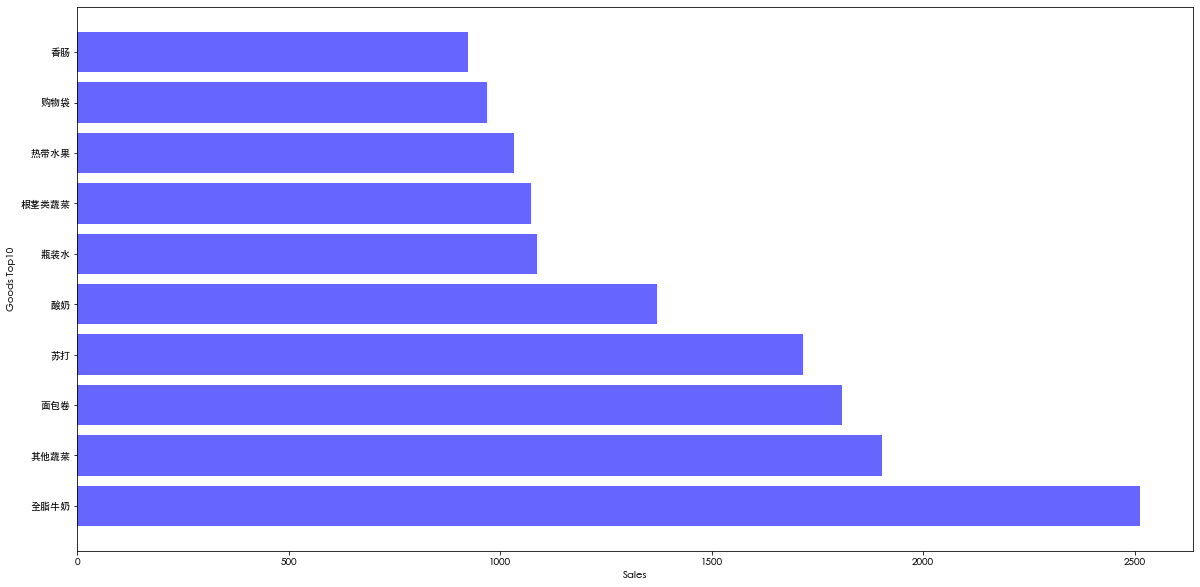

In [36]:
plt.barh(x,y,color='b',alpha=0.6)
plt.xlabel('Sales')
plt.ylabel('Goods Top10')
plt.show()

In [37]:
order_fn = 'tutorial/chapter8/demo/data/GoodsOrder.csv'
data = pd.read_csv(order_fn,encoding='gbk')

In [41]:
type_fn = 'tutorial/chapter8/demo/data/GoodsTypes.csv'
goods_types = pd.read_csv(type_fn,encoding='gbk')

In [42]:
goods_types.head()

,Goods,Types
0,白饭,熟食
1,白酒,酒精饮料
2,白兰地,酒精饮料
3,白面包,西点
4,半成品面包,西点


In [43]:
group = data.groupby(['Goods']).count().reset_index()

In [46]:
sorted_goods = group.sort_values('id',ascending=False).reset_index()

In [47]:
sorted_goods

,index,Goods,id
0,7,全脂牛奶,2513
1,8,其他蔬菜,1903
2,155,面包卷,1809
3,134,苏打,1715
4,150,酸奶,1372
...,...,...,...
164,33,厨房用具,4
165,23,包装袋,4
166,154,防腐用品,2
167,49,婴儿食品,1


In [48]:
del sorted_goods['index']

In [49]:
sort_links = pd.merge(sorted_goods,goods_types)

In [50]:
sort_links

,Goods,id,Types
0,全脂牛奶,2513,非酒精饮料
1,其他蔬菜,1903,果蔬
2,面包卷,1809,西点
3,苏打,1715,非酒精饮料
4,酸奶,1372,食品类
...,...,...,...
163,厨房用具,4,百货
164,包装袋,4,百货
165,防腐用品,2,百货
166,婴儿食品,1,百货


In [51]:
sort_links.Types.unique()

array(['非酒精饮料', '果蔬', '西点', '食品类', '百货', '肉类', '酒精饮料', '米粮调料', '零食', '熟食'],
      dtype=object)

In [54]:
types_sum=sort_links.groupby(['Types']).sum().reset_index()

In [55]:
res=types_sum.sort_values('id',ascending=False).reset_index()

In [56]:
del res['index']

In [58]:
total_goods = res['id'].sum()

In [60]:
res['percentage']=res.apply(lambda l : l['id'] / total_goods,axis=1)

In [61]:
res

,Types,id,percentage
0,非酒精饮料,7594,0.175442
1,西点,7192,0.166155
2,果蔬,7146,0.165092
3,米粮调料,5185,0.119787
4,百货,5141,0.118771
5,肉类,4870,0.112510
6,酒精饮料,2287,0.052836
7,食品类,1870,0.043202
8,零食,1459,0.033707
9,熟食,541,0.012499


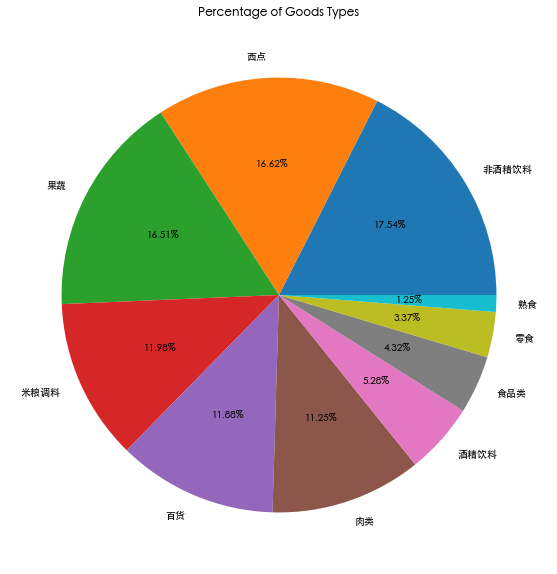

In [62]:
x = res['percentage']
y = res['Types']
plt.pie(x,labels=y,autopct='%1.2f%%')
plt.title('Percentage of Goods Types')
plt.show()

In [79]:
selected = sort_links.loc[sort_links['Types']=='非酒精饮料'].copy()

In [80]:
total_selected=selected['id'].sum()

In [81]:
selected['percentage']=selected.apply(lambda l : l['id'] / total_selected,axis=1)

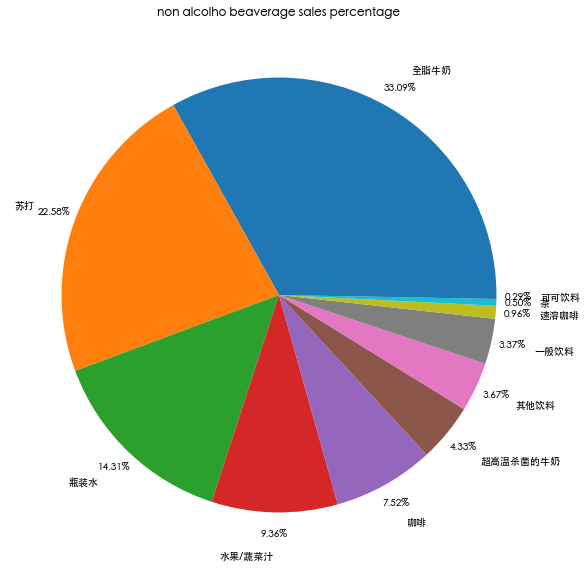

In [98]:
x = selected['percentage']
y = selected['Goods']
plt.pie(x,labels=y,autopct='%1.2f%%',pctdistance=1.1,labeldistance=1.2,normalize=True)
plt.title('non alcolho beaverage sales percentage')
plt.show()

In [99]:
order_fn = 'tutorial/chapter8/demo/data/GoodsOrder.csv'
data = pd.read_csv(order_fn,encoding='gbk')

In [100]:
data.Goods = data.Goods.apply(lambda x: ','+x)

In [102]:
data = data.groupby('id').sum().reset_index()

In [103]:
data

,id,Goods
0,1,",柑橘类水果,人造黄油,即食汤,半成品面包"
1,2,",咖啡,热带水果,酸奶"
2,3,",全脂牛奶"
3,4,",奶油乳酪,肉泥,仁果类水果,酸奶"
4,5,",炼乳,长面包,其他蔬菜,全脂牛奶"
...,...,...
9830,9831,",牛肉,黄油,鸡,巧克力,柑橘类水果,咖啡,面粉,葡萄,汉堡肉,卫生用品,餐巾,粉红葡萄酒,..."
9831,9832,",烹饪巧克力"
9832,9833,",黄油,鸡,柑橘类水果,保鲜膜/袋,本地蛋类,冷冻甜点,其他蔬菜,面包卷,朗姆酒,酸奶"
9833,9834,",瓶装啤酒,瓶装水,半成品面包,苏打"


In [104]:
data.Goods = data.Goods.apply(lambda x : [x[1:]])

In [105]:
data_list = list(data.Goods)

In [107]:
data_trans = []
for l in data_list:
    p = l[0].split(',')
    data_trans.append(p)

In [108]:
print(data_trans[:5])

[['柑橘类水果', '人造黄油', '即食汤', '半成品面包'], ['咖啡', '热带水果', '酸奶'], ['全脂牛奶'], ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'], ['炼乳', '长面包', '其他蔬菜', '全脂牛奶']]


In [112]:
dataSet = data_trans
L, supportData = apriori(dataSet, minSupport = 0.02)
rule = gen_rule(L, supportData, minConf = 0.35)

frozenset({'水果/蔬菜汁'}) --> frozenset({'全脂牛奶'}) 支持度 0.02664 置信度： 0.368495 lift值为： 1.44216
frozenset({'人造黄油'}) --> frozenset({'全脂牛奶'}) 支持度 0.024199 置信度： 0.413194 lift值为： 1.617098
frozenset({'仁果类水果'}) --> frozenset({'全脂牛奶'}) 支持度 0.030097 置信度： 0.397849 lift值为： 1.557043
frozenset({'牛肉'}) --> frozenset({'全脂牛奶'}) 支持度 0.021251 置信度： 0.405039 lift值为： 1.58518
frozenset({'冷冻蔬菜'}) --> frozenset({'全脂牛奶'}) 支持度 0.020437 置信度： 0.424947 lift值为： 1.663094
frozenset({'本地蛋类'}) --> frozenset({'其他蔬菜'}) 支持度 0.022267 置信度： 0.350962 lift值为： 1.813824
frozenset({'黄油'}) --> frozenset({'其他蔬菜'}) 支持度 0.020031 置信度： 0.361468 lift值为： 1.868122
frozenset({'本地蛋类'}) --> frozenset({'全脂牛奶'}) 支持度 0.029995 置信度： 0.472756 lift值为： 1.850203
frozenset({'黑面包'}) --> frozenset({'全脂牛奶'}) 支持度 0.025216 置信度： 0.388715 lift值为： 1.521293
frozenset({'糕点'}) --> frozenset({'全脂牛奶'}) 支持度 0.033249 置信度： 0.373714 lift值为： 1.462587
frozenset({'酸奶油'}) --> frozenset({'其他蔬菜'}) 支持度 0.028876 置信度： 0.402837 lift值为： 2.081924
frozenset({'猪肉'}) --> frozenset({'其他蔬菜'}